In [1]:
import json
import numpy as np
import keras

from keras.layers import Dense ,Dropout # Dense layers are "fully connected" layers
from keras.models import Sequential 
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD

import os

Using TensorFlow backend.


In [2]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

with open('data.json') as file:
	x = np.array(json.load(file))
x = np.concatenate((x, x), axis=0)
x = np.concatenate((x, x), axis=0)
x = np.concatenate((x, x), axis=0)

x = np.concatenate((x, x), axis=0)
x = np.concatenate((x, x), axis=0)
x = np.concatenate((x, x), axis=0)

x = np.concatenate((x, x), axis=0)
x = np.concatenate((x, x), axis=0)

with open('ans.json') as file:
	y = np.array(json.load(file))
y = np.concatenate((y, y), axis=0)
y = np.concatenate((y, y), axis=0)
y = np.concatenate((y, y), axis=0)


y = np.concatenate((y, y), axis=0)
y = np.concatenate((y, y), axis=0)
y = np.concatenate((y, y), axis=0)

y = np.concatenate((y, y), axis=0)
y = np.concatenate((y, y), axis=0)


print(x.shape)

(38656, 1500)


In [3]:
image_size = 1500 
num_classes = 22 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=1000, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=500, activation='sigmoid'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()


model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 22)                11022     
Total params: 2,012,522
Trainable params: 2,012,522
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)


print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Instructions for updating:
Use tf.cast instead.
Test loss: 0.0369
Test accuracy: 1.0


In [8]:
with open('data.json') as file:
    var = np.array(json.load(file))
    
print(model.predict(var))

[[9.86486554e-01 6.70753478e-04 1.80265313e-04 ... 1.18453354e-04
  1.18762378e-04 4.83421027e-05]
 [9.83583868e-01 7.45583849e-04 3.24381952e-04 ... 1.33741880e-04
  1.06527383e-04 6.80204903e-05]
 [9.79996443e-01 1.90952304e-03 2.45402101e-04 ... 1.49950502e-04
  2.15245120e-04 5.99741143e-05]
 ...
 [1.21710233e-04 3.94283648e-04 2.45777401e-03 ... 2.60612275e-03
  1.31837316e-02 9.58684266e-01]
 [2.43839677e-04 8.10207915e-04 3.37799988e-03 ... 2.52327626e-03
  1.04124276e-02 9.48699534e-01]
 [1.62438213e-04 5.70814358e-04 2.77048675e-03 ... 2.71922699e-03
  1.09262094e-02 9.59723711e-01]]


In [15]:
model.save("123")

OSError: Unable to create file (unable to open file: name = '123', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)

In [119]:
model.sample_weights("model1_w.h5")

TypeError: 'list' object is not callable

In [9]:
weights = []
for layer in model.layers:
    weights.append(layer.get_weights())

[array([[ 0.03331912, -0.04113431, -0.0411967 , ..., -0.0267916 ,
         -0.12130654, -0.10676878],
        [-0.06663328, -0.0160956 ,  0.08514869, ..., -0.05293047,
         -0.09718712,  0.14106914],
        [ 0.00606083, -0.00464612,  0.03412874, ..., -0.12207524,
         -0.01991953, -0.05427903],
        ...,
        [ 0.12590198,  0.04965756, -0.06271468, ...,  0.05389365,
          0.04947677,  0.12794356],
        [-0.16059372,  0.00774709, -0.02430856, ...,  0.06029856,
          0.0489029 ,  0.02494354],
        [ 0.13088827,  0.12399722, -0.16501698, ...,  0.01250961,
         -0.11857781,  0.11229135]], dtype=float32),
 array([-5.1167589e-03, -1.6329451e-03,  4.2484282e-03,  1.5220060e-03,
        -7.1662748e-03,  5.2990811e-03, -3.2669147e-03,  2.8653580e-03,
         3.6790245e-03, -6.8227220e-03, -5.5392287e-03, -3.3062694e-03,
         6.7359572e-03, -7.1413917e-03,  6.1051702e-05, -1.0095511e-02,
        -1.0974435e-02,  7.7255759e-03,  1.2969200e-02,  2.8550173e-03

In [10]:
import matplotlib.pyplot as plt

In [11]:
import cv2

1500


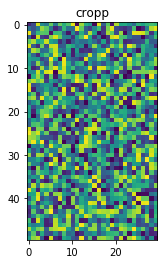

1500


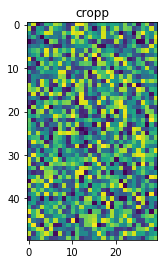

1500


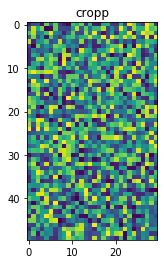

1500


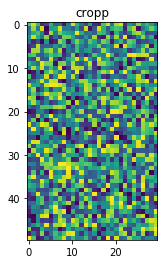

1500


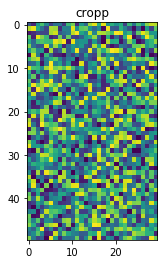

1500


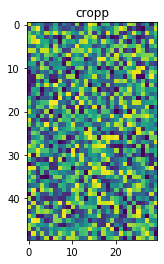

1500


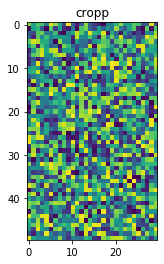

1500


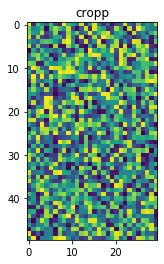

1500


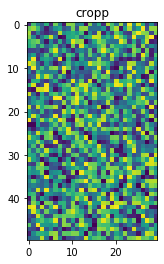

1500


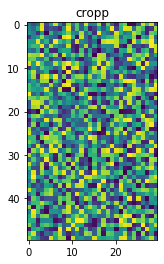

In [12]:
for i in range(0,10):
    a = np.array(weights[0][0])[:,i]
    print(len(a))

    b = a.reshape(-1, 30)
#     b = cv2.cvtColor(b, cv2.COLOR_HSV2RGB)

    plt.imshow(b)
    plt.title('cropp')
    plt.show()